<a href="https://colab.research.google.com/github/zareefrj/LSTM-Waste/blob/main/ARIMA_Waste_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARIMA Forecasting**

Step 1: Visualizing the dataset

In [34]:
import pandas as pd
df=pd.read_csv('WasteBin1.csv',index_col='Timestamp (UTC)',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (25851, 6)


,Device Tag,Calibrated Value,Sensor Type,Unit,Location Lat,Location Long
Timestamp (UTC),,,,,,
2022-12-02 00:46:11+00:00,mil-bin01,1241,Bin Sensor,mm,-34.187008,142.165156
2022-12-01 16:45:47+00:00,mil-bin01,896,Bin Sensor,mm,-34.187008,142.165156
2022-12-01 14:45:50+00:00,mil-bin01,878,Bin Sensor,mm,-34.187008,142.165156
2022-12-01 13:46:08+00:00,mil-bin01,873,Bin Sensor,mm,-34.187008,142.165156
2022-12-01 11:46:57+00:00,mil-bin01,873,Bin Sensor,mm,-34.187008,142.165156
...,...,...,...,...,...,...
2022-02-20 00:48:29+00:00,mil-bin08,99,Bin Sensor,mm,-35.072808,142.319291
2022-02-19 09:26:39+00:00,mil-bin08,99,Bin Sensor,mm,-35.072808,142.319291
2022-02-18 06:26:44+00:00,mil-bin08,99,Bin Sensor,mm,-35.072808,142.319291


<Axes: xlabel='Timestamp (UTC)'>

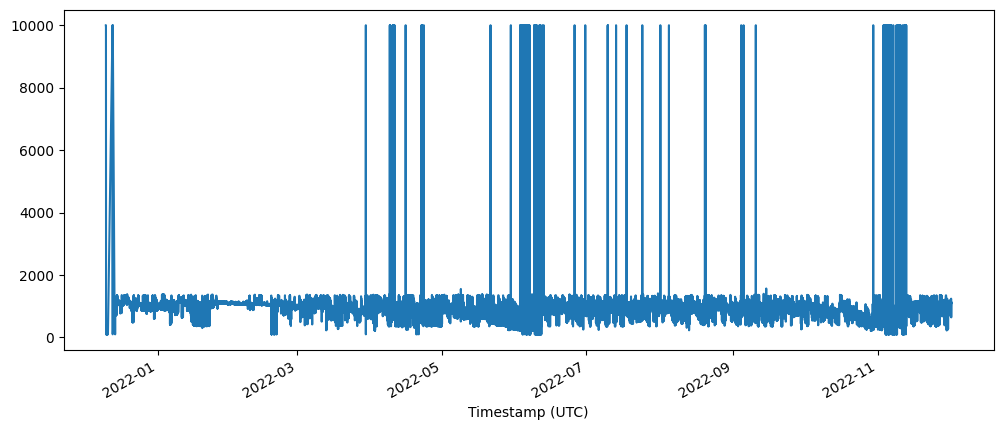

In [35]:
df['Calibrated Value'].plot(figsize=(12,5))

Step 2: Is the data set stationary?

In [38]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

     if dftest[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
     else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adf_test(df['Calibrated Value'])

1. ADF :  -14.980276518085658
2. P-Value :  1.1648754655019667e-27
3. Num Of Lags :  49
4. Num Of Observations Used For ADF Regression: 25801
5. Critical Values :
	 1% :  -3.430603476637117
	 5% :  -2.8616520291524483
	 10% :  -2.5668296298155786
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Step 3: Determine ARIMA Model

In [39]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:00


In [40]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Calibrated Value'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=408225.061, Time=61.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=417274.928, Time=0.75 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=411966.417, Time=0.96 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=409445.379, Time=5.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=417272.928, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=409364.936, Time=30.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=408470.995, Time=39.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=408425.016, Time=65.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=67.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=409111.737, Time=26.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=62.75 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=408395.863, Time=47.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=75.35 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=23.77 sec

Best model:  ARIMA(2,1

Step 4: Splitting the data set into training & testing sets

In [41]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(25851, 6)
(25821, 6) (30, 6)


Step 5: The ARIMA Model

In [43]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Calibrated Value'],order=(2,1,2))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Calibrated Value   No. Observations:                25821
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -203882.551
Date:                Wed, 14 Jun 2023   AIC                         407775.102
Time:                        04:11:52   BIC                         407815.896
Sample:                             0   HQIC                        407788.285
                              - 25821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8757      0.004    239.315      0.000       0.869       0.883
ar.L2         -0.0150      0.002     -6.849      0.000      -0.019      -0.011
ma.L1         -1.5158      0.004   -433.018      0.000      -1.523      -1.509
ma.L2          0.5201      0.003    152.222      0.000       0.513       0.527
sigma2      4.223e+05    486.022    868.922      0.000    4.21e+05    4.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):          17390319.98
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             6.67
Prob(H) (two-sided):                  0.00   Kurtosis:                       129.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Step 5: Prediction on Test Set

In [45]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=df.index[start:end+1]
print(pred)

Timestamp (UTC)
2022-03-11 07:14:08+00:00    738.478831
2022-03-10 07:13:57+00:00    761.805300
2022-03-07 07:14:54+00:00    785.463211
2022-03-06 07:13:55+00:00    805.830171
2022-03-04 07:13:52+00:00    823.310349
2022-03-04 03:14:08+00:00    838.311978
2022-03-03 07:13:32+00:00    851.186481
2022-03-03 03:13:55+00:00    862.235469
2022-03-02 07:14:59+00:00    871.717788
2022-03-02 03:14:56+00:00    879.855579
2022-02-27 07:13:42+00:00    886.839489
2022-02-27 03:13:44+00:00    892.833128
2022-02-26 11:14:15+00:00    897.976912
2022-02-26 07:13:37+00:00    902.391342
2022-02-26 03:13:50+00:00    906.179837
2022-02-25 07:14:00+00:00    909.431150
2022-02-25 03:13:34+00:00    912.221450
2022-02-24 07:13:27+00:00    914.616104
2022-02-24 03:13:45+00:00    916.671213
2022-02-23 23:13:39+00:00    918.434922
2022-02-23 11:14:30+00:00    919.948549
2022-02-23 07:13:42+00:00    921.247554
2022-02-23 03:18:47+00:00    922.362370
2022-02-22 07:13:26+00:00    923.319112
2022-02-20 01:48:26+00:0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Timestamp (UTC)'>

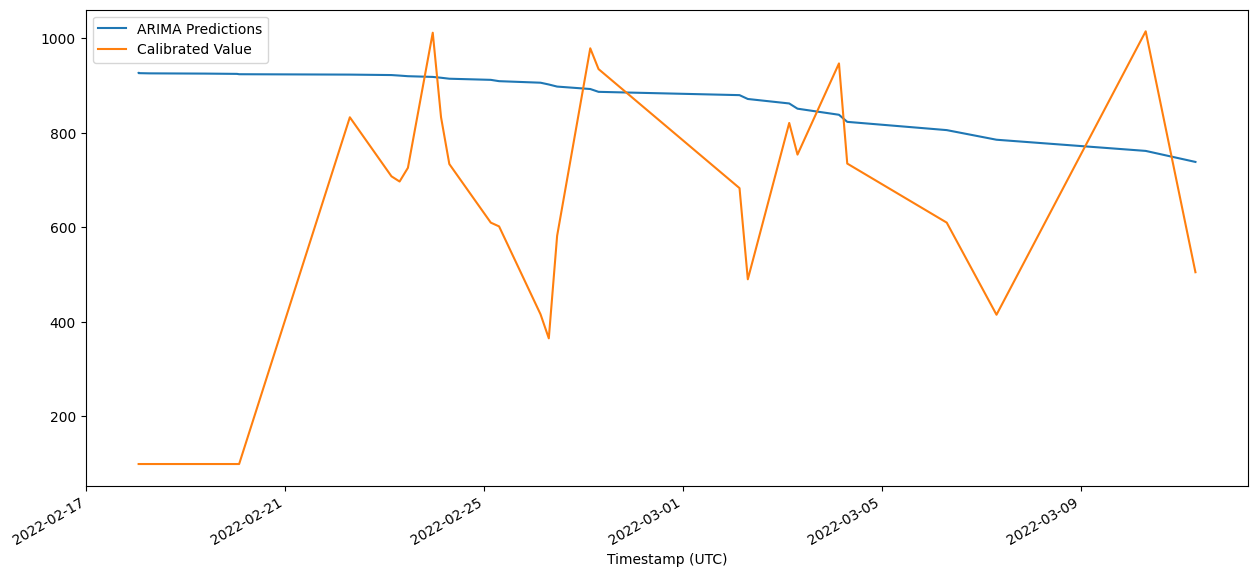

In [46]:
pred.plot(legend=True)
test['Calibrated Value'].plot(legend=True)

Check Model Accuracy

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Calibrated Value']))
print(rmse)

432.97248574047603


In [50]:
test['Calibrated Value'].mean()

586.7

Predicting the future

In [51]:
model2=ARIMA(df['Calibrated Value'],order=(2,1,2))
model2=model2.fit()
df.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

,Device Tag,Calibrated Value,Sensor Type,Unit,Location Lat,Location Long
Timestamp (UTC),,,,,,
2022-02-20 00:48:29+00:00,mil-bin08,99,Bin Sensor,mm,-35.072808,142.319291
2022-02-19 09:26:39+00:00,mil-bin08,99,Bin Sensor,mm,-35.072808,142.319291
2022-02-18 06:26:44+00:00,mil-bin08,99,Bin Sensor,mm,-35.072808,142.319291
2022-02-18 01:21:23+00:00,mil-bin08,99,Bin Sensor,mm,-35.072808,142.319291
2022-02-18 01:18:26+00:00,mil-bin08,99,Bin Sensor,mm,-35.072808,142.319291


In [53]:
index_future_dates=pd.date_range(start='2022-02-19',end='2022-03-21')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2022-02-19    320.347207
2022-02-20    393.653055
2022-02-21    455.937294
2022-02-22    508.986811
2022-02-23    554.170988
2022-02-24    592.655974
2022-02-25    625.435016
2022-02-26    653.354103
2022-02-27    677.133791
2022-02-28    697.387805
2022-03-01    714.638875
2022-03-02    729.332230
2022-03-03    741.847088
2022-03-04    752.506442
2022-03-05    761.585395
2022-03-06    769.318266
2022-03-07    775.904630
2022-03-08    781.514472
2022-03-09    786.292576
2022-03-10    790.362258
2022-03-11    793.828553
2022-03-12    796.780920
2022-03-13    799.295558
2022-03-14    801.437365
2022-03-15    803.261618
2022-03-16    804.815401
2022-03-17    806.138813
2022-03-18    807.266010
2022-03-19    808.226085
2022-03-20    809.043815
2022-03-21    809.740305
Freq: D, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

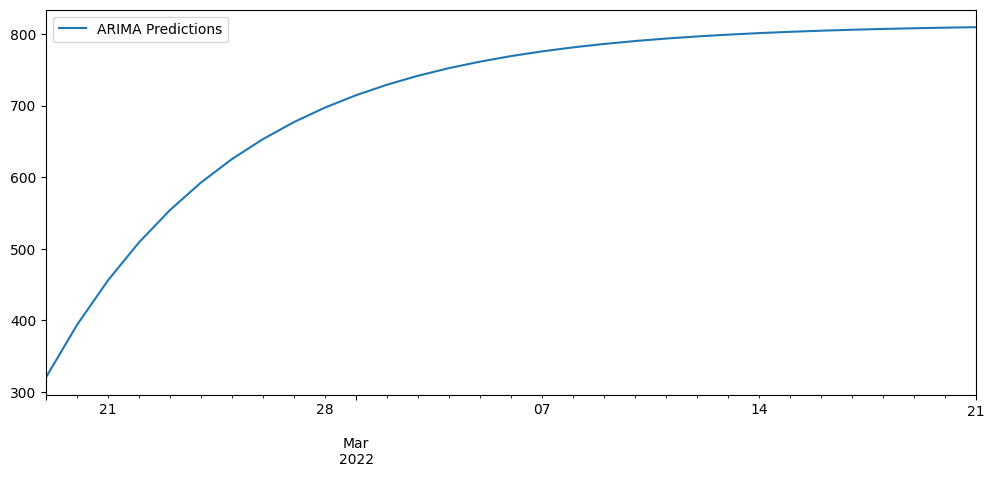

In [54]:
pred.plot(figsize=(12,5),legend=True)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the data
df = pd.read_csv('waste_generation.csv')
df

,ticket_date,net_weight_kg
0,2003-01-13,20170.0
1,2004-08-25,139140.0
2,2004-08-26,61480.0
3,2004-08-30,13160.0
4,2004-09-28,120740.0
...,...,...
5586,2021-07-05,1897290.0
5587,2021-07-06,1921640.0
5588,2021-07-07,1553080.0
5589,2021-07-08,1417650.0


In [ ]:
train_dates=pd.to_datetime(df['ticket_date'])
cols=list(df)[1:2]
print(cols)

['net_weight_kg']


<Axes: >

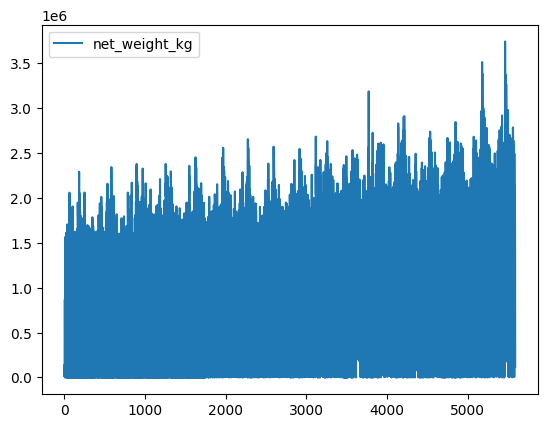

In [ ]:
training_df=df[cols].astype(float)
plot_df=training_df
plot_df.plot.line()

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar=scalar.fit(training_df)
training_df_scaled=scalar.transform(training_df)

In [ ]:
#Lists for storing the training data considering multiple variables
#trainX for storing training data (temperature,wind speed,relative humidity)
#trainY for storing target values(rainfall)
trainX=[]
trainY=[]

n_past=4479#20 values will be considered to predict the next values
n_fut=100#for predicting the next 100 value based on previous 20 values


#Adding the values to trainX and trainY lists
for i in range(n_past,len(training_df_scaled)-n_fut+1):
    trainX.append(training_df_scaled[i-n_past:i,0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i+n_fut-1:i+n_fut,0])

#Converting into numpy arrays
trainX,trainY=np.array(trainX),np.array(trainY)

print('trainX shape == {}'.format(trainX.shape))#Knowing the shape
#(364,20,4) means there are 364windows(groups) of 20*4


print('trainY shape == {}'.format(trainY.shape))
#There are 364 values from previous values

trainX shape == (1013, 4479, 1)
trainY shape == (1013, 1)


In [ ]:
model=Sequential()
model.add(LSTM(32,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4479, 32)          4352      
                                                                 
 dropout_3 (Dropout)         (None, 4479, 32)          0         
                                                                 
 lstm_4 (LSTM)               (None, 4479, 32)          8320      
                                                                 
 dropout_4 (Dropout)         (None, 4479, 32)          0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
history=model.fit(trainX,trainY,epochs=10,batch_size=5,validation_split=0.2,verbose=1)

Epoch 1/10
 15/162 [=>............................] - ETA: 20:35 - loss: 0.9851

KeyboardInterrupt: ignored

In [ ]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_past = 1
n_days_for_prediction=100

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

# make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 1 variables for transform, the inverse expects same dimensions
prediction_copies = np.repeat(prediction, training_df.shape[1], axis=-1)

y_pred_future = scalar.inverse_transform(prediction_copies)[:,0]

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'ticket_date':np.array(forecast_dates), 'net_weight_kg':y_pred_future})
df_forecast['ticket_date']=pd.to_datetime(df_forecast['ticket_date'])

4/4 [==============================] - 1s 24ms/step


<Axes: xlabel='ticket_date', ylabel='net_weight_kg'>

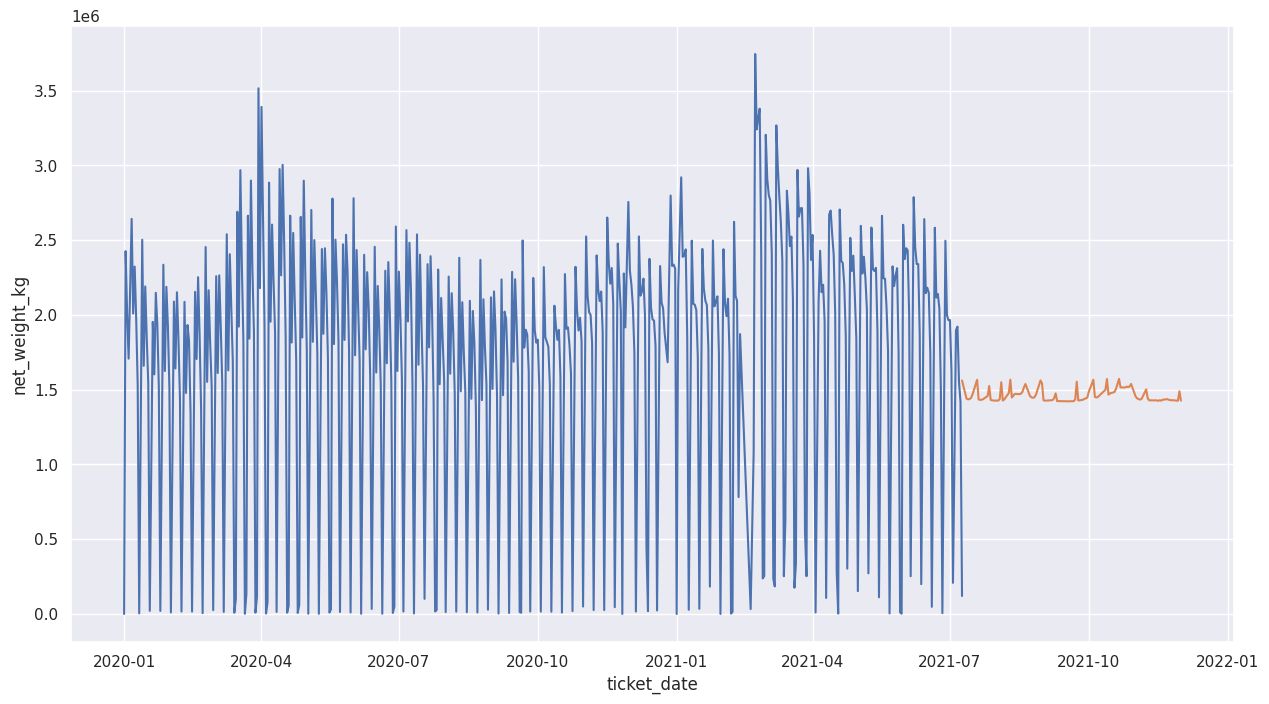

In [ ]:
import seaborn as sns

original = df[['ticket_date', 'net_weight_kg']]
original['ticket_date']=pd.to_datetime(original['ticket_date'])
original = original.loc[original['ticket_date'] >= '2020-1-1']

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=original['ticket_date'], y=original['net_weight_kg'])
sns.lineplot(x=df_forecast['ticket_date'], y=df_forecast['net_weight_kg'])